In [1]:
import pandas as pd
import os
import sys
sys.path.append(os.path.pardir)
import core,model
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import torch
import numpy as np
import pdb
import torch.tensor as tensor
from matplotlib import pyplot as plt
torch.cuda.set_device(1)

In [2]:
label_index_img_c = {'frog':0,'truck':1,'deer':2,'automobile':3,'bird':4,'horse':5,'ship':6,'cat':7,'airplane':8,'dog':9}
train_path = '/data/gpf/tutorial/dl/cnn/cifar/train'
test_path = '/data/gpf/tutorial/dl/cnn/cifar/test'

In [3]:
path_labels_train = core.get_img_path_label_from_path(train_path,label_index_img_c)

frog:5000
truck:5000
deer:5000
automobile:5000
bird:5000
horse:5000
ship:5000
cat:5000
airplane:5000
dog:5000


In [4]:
path_labels_test = core.get_img_path_label_from_path(test_path,label_index_img_c)

frog:1000
truck:1000
deer:1000
automobile:1000
bird:1000
horse:1000
ship:1000
cat:1000
airplane:1000
dog:1000


In [5]:
img_paths, labels = zip(*path_labels_train)
#dl = core.make_batches_img(np.array(img_paths), np.array(labels).astype(int),bs=64)
dl = core.dl_img(np.array(img_paths), np.array(labels).astype(int),bs=64)

In [6]:
a = next(iter(dl))

Making batches... batch size: 64,num of batchese: 782


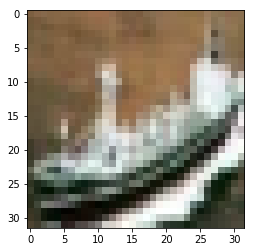

In [7]:
plt.imshow((a[0][0].numpy()).astype(int))

In [6]:
#[32*32*3, 40,10]
class SimpleNet(nn.Module):
    
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList([nn.Linear(layers[i],layers[i+1]) for i in range(len(layers)-1)])
        
    def forward(self, seq):
        bs = seq.size()[0]
        X = seq.view(bs,-1)
        for layer in self.layers:
            X = F.relu(layer(X))
        return F.log_softmax(X,dim=-1)
    
    def get_device(self):
        p = next(self.parameters())
        device_type = str(p.device.type)
        device_index = p.device.index
        ret = device_type + ':' + str(device_index) if device_type == 'cuda' else device_type
        return torch.device(ret) 
    

m = SimpleNet([32*32*3,40,10]).cuda()
m

SimpleNet(
  (layers): ModuleList(
    (0): Linear(in_features=3072, out_features=40, bias=True)
    (1): Linear(in_features=40, out_features=10, bias=True)
  )
)

In [7]:
opt = optim.SGD(m.parameters(),lr=0.1,momentum=0.5)
loss_fn = F.nll_loss

In [8]:
core.fit(m,dl,10,opt,loss_fn)

  0%|          | 0/10 [00:00<?, ?it/s]

model is been trained on cuda:1
Making batches... batch size: 64,num of batchese: 782


 10%|█         | 1/10 [00:04<00:44,  5.00s/it]

Epoch: 0, total loss: 1522.6445281505585
Making batches... batch size: 64,num of batchese: 782


 20%|██        | 2/10 [00:09<00:39,  4.90s/it]

Epoch: 1, total loss: 1458.159904718399
Making batches... batch size: 64,num of batchese: 782


 30%|███       | 3/10 [00:14<00:34,  4.87s/it]

Epoch: 2, total loss: 1437.8746687173843
Making batches... batch size: 64,num of batchese: 782


 40%|████      | 4/10 [00:19<00:29,  4.87s/it]

Epoch: 3, total loss: 1440.5406029224396
Making batches... batch size: 64,num of batchese: 782


 50%|█████     | 5/10 [00:24<00:24,  4.81s/it]

Epoch: 4, total loss: 1415.5925860404968
Making batches... batch size: 64,num of batchese: 782


 60%|██████    | 6/10 [00:28<00:19,  4.80s/it]

Epoch: 5, total loss: 1399.5946494340897
Making batches... batch size: 64,num of batchese: 782


 70%|███████   | 7/10 [00:33<00:14,  4.81s/it]

Epoch: 6, total loss: 1385.917455792427
Making batches... batch size: 64,num of batchese: 782


 80%|████████  | 8/10 [00:38<00:09,  4.79s/it]

Epoch: 7, total loss: 1374.4950954914093
Making batches... batch size: 64,num of batchese: 782


 90%|█████████ | 9/10 [00:43<00:04,  4.79s/it]

Epoch: 8, total loss: 1377.2594555616379
Making batches... batch size: 64,num of batchese: 782


100%|██████████| 10/10 [00:47<00:00,  4.78s/it]

Epoch: 9, total loss: 1368.1898460388184
Saving model to /data/gpf/gpf_dl/tests/tmp_torch_model.torch


In [12]:
img_paths, labels = zip(*path_labels_test)

In [13]:
img_paths, labels = zip(*path_labels_test)
dl = core.dl_img(np.array(img_paths), np.array(labels).astype(int),bs=64)

In [14]:
imgs,labels = zip(*dl)

Making batches... batch size: 64,num of batchese: 157


In [15]:
preds = core.predict_batch_img(m,imgs)

In [16]:
expects = []
a = [expects.extend(v.tolist()) for v in labels]

In [17]:
core.evaluation_matrix(np.array(preds),np.array(expects))

---------------------------0-------------------------------
total:  1000
correct:  1000
accuracy:  1.0
---------------------------1-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------2-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------3-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------4-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------5-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------6-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------7-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------8-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------9-------------------------------
total:  1000
correct:  0
accuracy:  0

In [74]:
import torch
import torchvision
import torchvision.transforms as transforms

In [76]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [81]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        opt.zero_grad()

        # forward + backward + optimize
        outputs = m(inputs.to(torch.device('cuda:1')))
        loss = loss_fn(outputs, labels.to(torch.device('cuda:1')))
        loss.backward()
        opt.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1976.440
[1,  4000] loss: 59.830
[1,  6000] loss: 17.826
[1,  8000] loss: 9.478
[1, 10000] loss: 5.936
[1, 12000] loss: 5.227
[2,  2000] loss: 3.812
[2,  4000] loss: 2.746
[2,  6000] loss: 2.778
[2,  8000] loss: 2.584
[2, 10000] loss: 2.968
[2, 12000] loss: 2.463
Finished Training


In [93]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = m(images.to(torch.device('cuda:1')))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels.to(torch.device('cuda:1'))).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 64 %
Accuracy of  bird :  7 %
Accuracy of   cat : 28 %
Accuracy of  deer : 25 %
Accuracy of   dog : 17 %
Accuracy of  frog : 62 %
Accuracy of horse : 58 %
Accuracy of  ship : 32 %
Accuracy of truck :  1 %


In [95]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = m(images.to(torch.device('cuda:1')))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(torch.device('cuda:1'))).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 35 %
